STAT 4609: Homework 2
***
In this homework assignment you will be tasked with implementing logistic regression and a basic optimization method for estimating the regression parameters. Suppose we have some inputs $X \in \mathbb{R}^{N \times D}$ with $N$ observations and $D$ covariates. Our targets are $y \in \{0,1\}^{N}$. Our regression parameters are $\beta \in \mathbb{R}^{D}$ and the link function between our linear model $X\beta$ and the targets is the logistic function $\sigma(X\beta) = \frac{1}{1+\exp{\{-X\beta\}}}$. Assume that we have i.i.d. observations that follow a Bernoulli likelihood: $ L(\beta) = \prod_{i=1}^{N} \sigma(X_i\beta)^{y_i} (1-\sigma(X_i\beta))^{1-y_i} $. Remember: In logistic regression you are maximizing the (log) likelihood.

1.) Write out the gradient of the log likelihood function with respect to the regression parameters, $\beta$. Please show your work and simplify the final answer as much as possible.

2.) Like the last homework assignment, please write a Python object containing the necessary functions to fit a logistic regression model. For numerical stability reasons, I have included a scipy implementation of the logistic function ("expit"). Read this article as to why we should use this function: https://timvieira.github.io/blog/post/2014/02/11/exp-normalize-trick/. For this assignment we do not have to search for an optimal step size and we will just use a fixed constant step size.


In [12]:
# You may only use the base Python library and the following packages for the LogisticRegression class in your homework assignment.
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit

class LogisticRegression(object):
    def __init__(self,X,Y):
        self.X=X
        self.Y=Y

    #takes in X and beta to return gradient for fit function
    def gradient_descent(self,last_beta):
        expit_y=expit(self.X@last_beta)
        return np.transpose(self.X)@(self.Y-expit_y)
    
    def fit(self,step,max_iter=1000,tol=10**-4):
        beta=[]
        log_like=[]
        curr_beta=np.random.rand(self.X.shape[1])
        curr_beta_update=np.random.rand(self.X.shape[1])
        curr_log_like=(np.sum(self.Y*np.log(expit(self.X@curr_beta))+(1-self.Y)*np.log(1-expit(self.X@curr_beta))))
        for i in range(max_iter):
            if np.sqrt(np.sum(np.array(curr_beta_update)**2))<tol and i>0:
                 break
            else:
                beta.append(curr_beta)
                log_like.append(curr_log_like)
                curr_beta_update=self.gradient_descent(curr_beta)
                curr_beta=curr_beta+step*curr_beta_update
                curr_log_like=np.sum(self.Y*np.log(expit(self.X@curr_beta))+(1-self.Y)*np.log(1-expit(self.X@curr_beta)))
                
        self.beta=beta
        self.log_like=log_like
        return self
        
    def predict(self,X):
        return expit(X@self.beta[-1])
    
    

3.) Use the synthetic data generated in the below cell to test out your logistic regression code. Generate a plot the shows the value of the log likelihood on the Y-axis and the iteration number on the X-axis. The log likelihood should increase as the number of iterations increases.

[-85.62451367023871, -85.48494695016173, -85.3457510688522, -85.20692562409106, -85.06847021154375, -84.93038442475368, -84.79266785513606, -84.65532009197169, -84.51834072240081, -84.38172933141718, -84.24548550186223, -84.10960881441942, -83.97409884760857, -83.8389551777805, -83.70417737911168, -83.5697650235992, -83.43571768105562, -83.30203491910417, -83.1687163031742, -83.03576139649647, -82.90316976009899, -82.77094095280265, -82.63907453121737, -82.50757004973825, -82.37642706054184, -82.24564511358282, -82.11522375659062, -81.98516253506646, -81.85546099228041, -81.72611866926874, -81.59713510483152, -81.4685098355303, -81.34024239568609, -81.2123323173776, -81.08477913043956, -80.9575823624614, -80.83074153878604, -80.70425618250911, -80.57812581447803, -80.45234995329176, -80.32692811530043, -80.20185981460557, -80.07714456306005, -79.95278187026892, -79.82877124358993, -79.70511218813473, -79.58180420676987, -79.45884680011858, -79.33623946656228, -79.21398170224292, -79.09

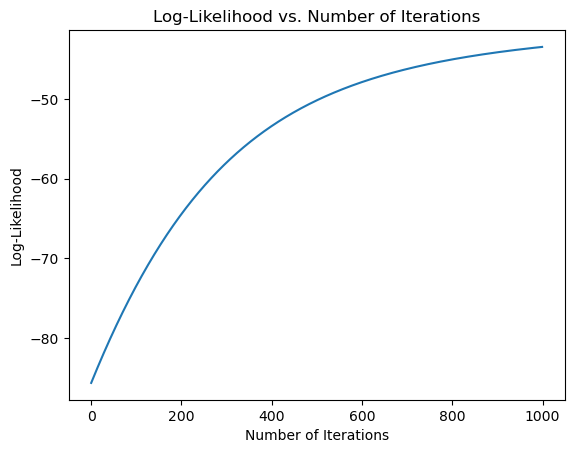

In [13]:
N = 100
D = 10
X = np.random.normal(size=(N,D))
beta0 = np.random.normal(size=D)
P = expit(X @ beta0)
Y = np.random.binomial(1,P)

#fit logistic regression on data
trial_fit=LogisticRegression(X,Y)
trial_fit.fit(step=.0001)
print(trial_fit.log_like)

#plot graph to show log-likelihood vs number of iterations graph
iterations=range(len(trial_fit.log_like))
plt.plot(iterations,trial_fit.log_like)
plt.xlabel('Number of Iterations')
plt.ylabel('Log-Likelihood')
plt.title('Log-Likelihood vs. Number of Iterations')
plt.show()

4.) Load the "breast_cancer_dataset" from scikit-learn and fit your logistic regression model on a training set consisting of the first 500 observations and evaluate the test set on the remaining data. One common metric to evaluate the test set performance of binary classifiers is looking at the confusion matrix of the predicted labels. The confusion matrix tells you the number of true positive / negative predictions as well as the false positive / negative predictions in your classifier. Plot the confusion matrix for your logistic regression classifier. You may use the decision rule that the test predictions with the probability that $P(y^{\ast} = 1 | X^{\ast} > .5$ are labeled "1". You are allowed to use the "confusion_matrix" function in scikit-learn for this problem.

In [14]:
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()
X = breast_cancer['data']
# for numerical stability, standardize inputs
X -= X.mean(axis=0)
X /= X.std(axis=0)
# add intercept
X = np.hstack((X, np.ones((X.shape[0], 1))))
Y = breast_cancer['target']
X_train, X_test = X[:500], X[500:]
Y_train, Y_test = Y[:500], Y[500:]
LR = LogisticRegression(X=X_train,Y=Y_train)
LR.fit(step=.0001)

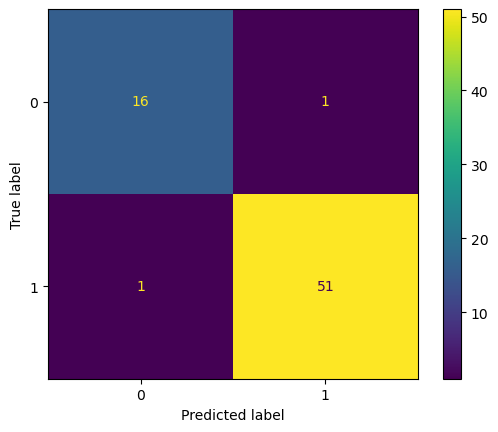

In [15]:
LR_predict_prob=LR.predict(X_test)
LR_class=np.where(LR_predict_prob<0.5,0,1)

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
#Plot confusion matrix table
con_mat=confusion_matrix(LR_class,Y_test)
con_mat_disp=ConfusionMatrixDisplay(confusion_matrix=con_mat,display_labels=(0,1))
con_mat_disp.plot()
plt.show()


5.) Now write a class object to fit a naive Bayes classifier to the same breast cancer data set (you should notice that training an NB classifier should be a bit faster than in LR--it would be good to understand why). Evaluate your classifier on the same test set as in the above question and print the confusion matrix for your predicted labels. Compare how the naive Bayes classifier performs on the predicted labels compared to logistic regression.

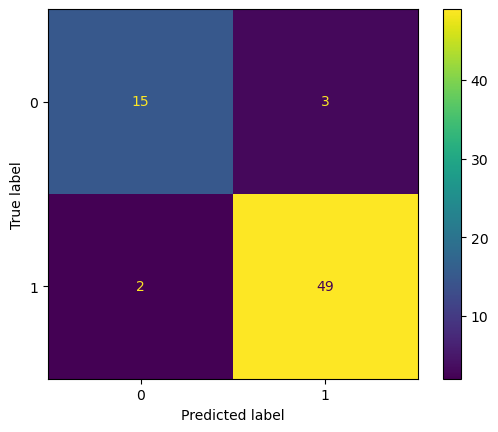

In [16]:
class NaiveBayes(object):
    def __init__(self,X,Y):
        #remove intercept
        self.X=X[:,:-1]
        self.Y=Y
    
    def fit(self):
        mean=[]
        var=[]
        class_prob=[]
        for i in np.unique(self.Y):
            #fit class probability
            class_prob.append(self.Y[self.Y==i].shape[0]/self.Y.shape[0])

            #fit class mean and variance
            mean.append(np.mean(self.X[self.Y==i],axis=0))
            var.append(np.var(self.X[self.Y==i],axis=0))

        self.mean=np.array(mean)
        self.var=np.array(var)
        self.class_prob=np.array(class_prob)
        return self
    
    def predict(self,X):
        Pyx=[]
        #calculate P(yi,xi) for each yi(class)
        for i in np.unique(self.Y):
            Pxi_y=(np.sqrt(2*np.pi*self.var[i]))**(-1)*np.exp(-0.5*(X[:,:-1]-self.mean[i])**2/self.var[i])
            Py=self.class_prob[i]
            Pyx.append(np.prod(Pxi_y,axis=1)*Py)
        
        #choose the yi(class) with highest likelihood   
        pred=np.argmax(Pyx,axis=0)
        return pred

#Fit NB model
NB=NaiveBayes(X_train,Y_train).fit()
#Predict on X_test
NB_predicted=NB.predict(X_test)

#Plot confusion matrix table
con_mat_1=confusion_matrix(NB_predicted,Y_test)
con_mat_1_disp=ConfusionMatrixDisplay(confusion_matrix=con_mat_1,display_labels=(0,1))
con_mat_1_disp.plot()
plt.show()



#why naive Bayes is faster LR
#naive Bayes has closed form solutions for parameters, do not require gradient descent to fit parameters like logistic regression

#Naive Bayes compared against Logistic Regression
#Naive Bayes performs much worse than logistic regression on the test set, with accuracy of 92.75%  NB vs 97.1% LR
#Naive Bayes wrongly predicts more negative data points as positive